In [973]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [974]:
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)  

# Load Data

In [1008]:
def load_raw_data():
    df_pubmed = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="Harmonized Information Extracti")
    df_pubmed['publication_type'] = "biomedical_journal"
    df_acl = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="ACLEMNLP Google Scholar")
    df_acl['publication_type'] = "nlp_venue"
    return df_pubmed, df_acl

In [1009]:
df_pubmed, df_acl = load_raw_data()

In [1010]:
def load_raw_data_included_all():
    df_pubmed, df_acl = load_raw_data()
    df_included = df_pubmed[df_pubmed['Included'] == 1.0]
    df_acl_included = df_acl[df_acl['Included'] == 1.0]
    df = pd.concat([df_included, df_acl_included], ignore_index=True)
    df['year'] = df['year'].astype(int)
    print(df_pubmed.shape, df_included.shape, df_acl.shape, df_acl_included.shape)
    return df

In [1011]:
df_2024 = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="SED Version Sijing Extractions ")
## ALIGN WITH PREVIOUS NAMES
# Replace 'Association for Computational Linguistics' with 'ACL'
df_2024['journal'] = df_2024['journal'].str.replace('Association for Computational Linguistics', 'ACL', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('BMC bioinformatics', 'BMC Bioinformatics', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('Frontiers in psychiatry', 'Frontiers in Psychiatry', regex=False)

# Replace 'ACL Findings' followed by any characters with 'ACL/Findings'
df_2024['journal'] = df_2024['journal'].str.replace(r'ACL Findings.*', 'ACL/ Findings', regex=True)
df_2024['journal'] = df_2024['journal'].str.replace(r'Findings of the ACL.*', 'ACL/ Findings', regex=True)

df_2024['journal'] = df_2024['journal'].str.replace(r'EMNLP.*', 'EMNLP', regex=True)


In [1012]:
df_2024['publication_type'] = np.where(
    df_2024['journal'].str.contains('EMNLP|ACL'), 
    'nlp_venue', 
    'biomedical_journal'
)

In [1013]:
df_2024_included = df_2024[df_2024['Included'] == 1.0]
df_2024_included.loc[:, 'year'] = df_2024_included['year'].astype(int)


/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1014]:
set(df_2024_included['journal'])

{'ACL/ Findings',
 'Artificial Intelligence in the Life Sciences',
 'Artificial intelligence in medicine',
 'BMC Bioinformatics',
 'BMC Medical Informatics and Decision Making',
 'BMJ Health & Care Informatics',
 'Bioinformatics',
 'Chemical Research in Toxicology',
 'Frontiers in Genetics',
 'Frontiers in Neuroinformatics',
 'Frontiers in Pharmacology',
 'Frontiers in Psychiatry',
 'Genes & Genomics',
 'Indian Dermatology Online Journal',
 'Informatics in Medicine Unlocked',
 'Journal of Biomedical Informatics',
 'Journal of Biomedical Semantics',
 'Journal of Computational Biology',
 'Journal of Medical Internet Research',
 'Journal of the American Heart Association',
 'Journal of the American Medical Informatics Association',
 'Molecular & Cellular Proteomics',
 'Neurocomputing',
 'Plos one',
 'Proceedings of the 68th Annual Meeting of the German Association of Medical Informatics, Biometry, and Epidemiology',
 'Radiology',
 'Scientific Reports',
 'Systematic Reviews',
 'The 22nd Wo

In [1015]:
df_2024_included.groupby("publication_type")["title"].count()

publication_type
biomedical_journal    48
nlp_venue              8
Name: title, dtype: int64

In [1016]:
df_initial = load_raw_data_included_all()

(504, 71) (89, 71) (491, 68) (51, 68)


In [1017]:
# Creating sets of lowercased titles for each DataFrame
titles_df1 = set(df_initial['title'].str.lower())
titles_df2 = set(df_2024_included['title'].str.lower())

# Finding the intersection of the two sets
overlap_titles = titles_df1.intersection(titles_df2)

# Counting the number of overlaps
number_of_overlaps = len(overlap_titles)

In [1018]:
overlap_titles

set()

In [1019]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)

In [1020]:
df.shape

(196, 74)

In [1021]:
df.groupby("publication_type")["title"].count()

publication_type
biomedical_journal    137
nlp_venue              59
Name: title, dtype: int64

In [1022]:
df.head(3)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journ

# Explorative

### Abstracts embeddings

In [600]:
df.head(2)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32,Biomedical Domain,Domain Details,Biomedical Domain Level 1,Biomedical Domain Level 2,Biomedical Domain Level 3
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,Knowledge Management/Literature Screening/ Met...,improve the precision of retrieving high-qual...,Knowledge Management,Literature Screening,Methodological Quality
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based

In [601]:
# Find rows where 'abstract' is NaN
nan_rows = df[df['abstract'].isna()]

# Display these rows
print(nan_rows['doi'])

105    10.18653/v1/2021.findings-emnlp.297
106           10.18653/v1/2021.bionlp-1.21
130          10.18653/v1/2022.acl-short.70
140                    10.1093/bib/bbad226
141           10.18653/v1/2023.bionlp-1.54
142              10.48550/arXiv.2205.11342
143       10.18653/v1/2023.findings-acl.24
144             10.1186/s12859-023-05411-z
145                  10.1093/jamia/ocad190
146    10.18653/v1/2023.findings-emnlp.474
147              10.1016/j.jbi.2023.104384
148             10.1186/s12859-023-05439-1
149      10.18653/v1/2023.findings-acl.749
150             10.1186/s13326-023-00292-w
151             10.1186/s13643-023-02353-8
152              10.1101/2023.07.24.550359
153              10.1016/j.jbi.2023.104370
154              10.1101/2023.06.23.546229
155            10.1101/2023.09.06.23295149
156           10.1016/j.ailsci.2023.100078
157             10.3389/fgene.2023.1238140
158      10.18653/v1/2023.findings-acl.263
159             10.3389/fgene.2023.1161047
160        

In [383]:
set(df['Biomedical Domain Level 1'])

{'Biological Functions',
 'Clinical',
 'Data Privacy',
 'Evidence-Based Medicine',
 'General biomedical text mining',
 'Knowledge Management',
 'Media for Health Care',
 'Pharma'}

In [388]:
# Dictionary for mapping
abbreviation_dict = {
    'Biological Functions': 'BioFct',
    'Clinical': 'Clinical',
    'Data Privacy': 'Data Privacy',
    'Evidence-Based Medicine': 'EBM',
    'General biomedical text mining': 'General',
    'Knowledge Management': 'KM',
    'Media for Health Care': 'Media',
    'Pharma': 'Pharma'
}

# Map the abbreviations
df['Biomedical Domain Abbrev'] = df['Biomedical Domain Level 1'].map(abbreviation_dict)

In [359]:
pip install gensim

DEPRECATION: prodigy 1.11.8 has a non-standard dependency specifier srsly>=2.0.0<3.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of prodigy or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [385]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/donevas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


using doc2vec


/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



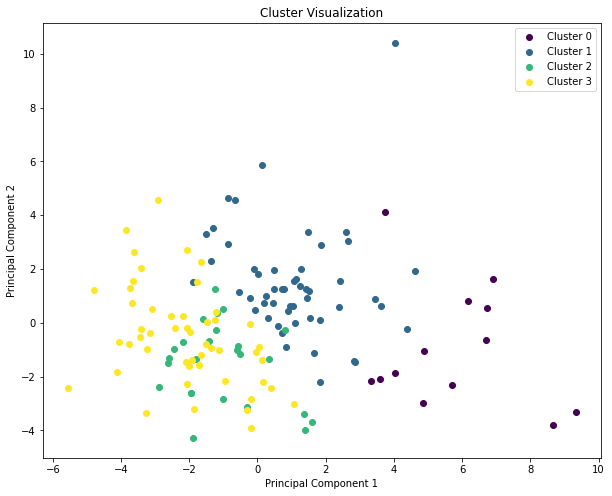

In [386]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Preprocess the abstracts (tokenization, lowercase, stop words removal, etc.)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
embed_model = "doc2vec"

def preprocess_text(text):
    # Remove non-alphanumeric characters
    if not text:
        print("Issue with the current abstract")
    #print(text)
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercase conversion
    tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

df['Preprocessed_Abstract'] = df['abstract'].apply(preprocess_text)

if embed_model == "doc2vec":
    print("using doc2vec")
    # Step 3: Prepare Data for Doc2Vec
    tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(df['Preprocessed_Abstract'])]

    # Step 4: Initialize and Train Doc2Vec Model
    model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

    # Step 5: Vectorize Abstracts using Doc2Vec
    X = np.array([model.infer_vector(doc.words) for doc in tagged_data])
else:
    # Step 3: Vectorize the abstracts
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Step 4: Choose a clustering algorithm (K-means in this example)
num_clusters = 4 # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Step 5: Apply the clustering algorithm
# List of cluster labels
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
if embed_model == "doc2vec":
    X_pca = pca.fit_transform(X)
else:
    X_pca = pca.fit_transform(X.toarray())

# List of unique cluster labels
unique_clusters = np.unique(cluster_labels)

# List of colors for each cluster label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot of PCA-transformed data points with cluster labels as colors
for cluster_label, color in zip(unique_clusters, colors):
    mask = cluster_labels == cluster_label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('viz/cluster_vis_{}_pca.png'.format(embed_model))  # Change the format and resolution as needed
plt.show()

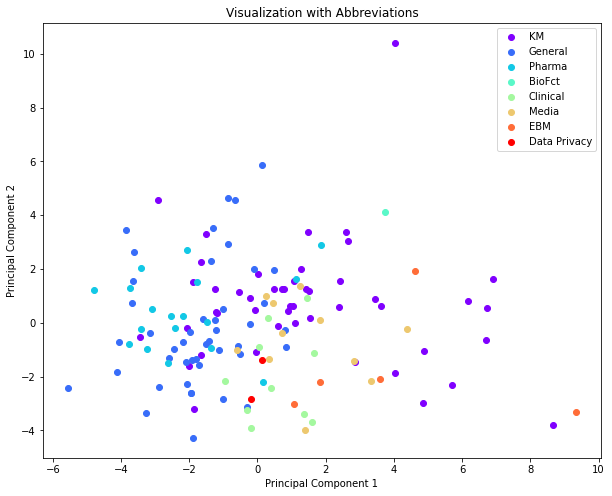

In [390]:
# Get unique abbreviations and assign a unique color to each
unique_abbreviations = df['Biomedical Domain Abbrev'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_abbreviations)))
abbreviation_to_color = dict(zip(unique_abbreviations, colors))

# Create a new column for colors based on abbreviations
df['Color'] = df['Biomedical Domain Abbrev'].map(abbreviation_to_color)

# Plot
plt.figure(figsize=(10, 8))

for abbreviation in unique_abbreviations:
    mask = df['Biomedical Domain Abbrev'] == abbreviation
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=abbreviation_to_color[abbreviation], label=f'{abbreviation}')

plt.title('Visualization with Abbreviations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('viz/abbreviation_vis_{}_pca.png'.format(embed_model))
plt.show()


In [239]:
cluster_labels

array([0, 1, 0, 1, 0, 2, 2, 0, 3, 3, 2, 1, 3, 2, 1, 0, 2, 1, 2, 1, 1, 3,
       3, 2, 1, 0, 1, 2, 3, 3, 2, 3, 1, 2, 2, 0, 2, 3, 3, 0, 3, 1, 2, 3,
       1, 3, 1, 3, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 2, 3, 1, 0, 3, 0, 3, 1,
       1, 3, 1, 2, 3, 1, 2, 1, 0, 2, 3, 0, 2, 0, 3, 3, 3, 1, 3, 1, 2, 3,
       1, 2, 2, 2, 3, 3, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 2, 3,
       3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 1], dtype=int32)

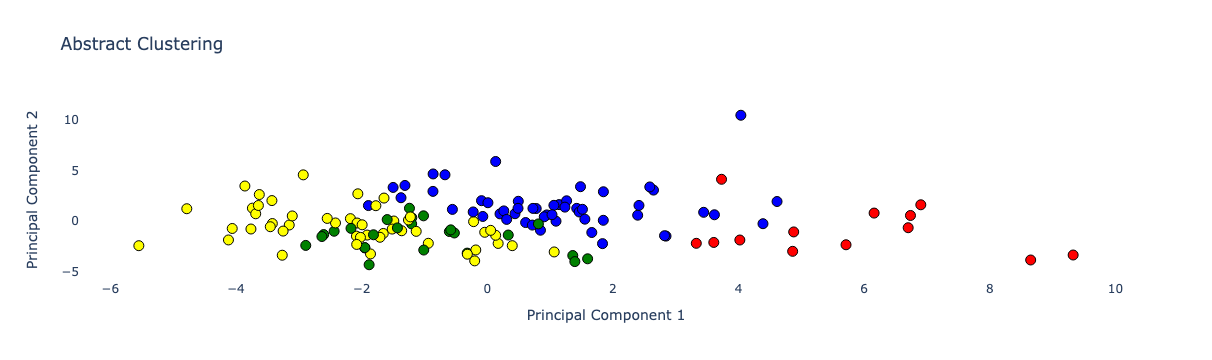

In [394]:
df['Cluster'] = cluster_labels

import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange', "pink", "black", "grey"]

fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title']
))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=1000
)

# Show the plot
fig.show()

# Abstracts Clustering

In [3]:
!pip install wordcloud

In [198]:
df =pd.read_excel("data/Scoping_review_text-analysis_extraction_20231115.xlsx", sheet_name="Harmonized Information Extracti")


In [199]:
df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP
0,NaN,NaN,NaN,NaN,NaN,NaN,"SD, BVI","0=no, 1=yes","No biomedical domain, no LLMs, grey literature...",NLP task solved - selection,"free text e.g., drug-drug interaction, in vivo...",for what kind of data has the application been...,NaN,NaN,"yes, if there is a public interface providing ...","free text, if no LLM was used, which technolog...","free text, e.g. BERT",other models that are combined in the overall ...,"free text, e.g. flow of the data through the s...","free text, language used for the model develop...","free text, e.g. PyTorch, Tensorflow, HuggingFace","free text, e.g. PyTorch, Tensorflow, HuggingFace","free text, e.g. accuracy, F1, Presision, Recall","free text, e.g. accuracy, F1, Presision, Recall","free text, e.g. yes/no","if source code available, link to the repository","free text, e.g. yes/no and link to the repository","free text, e.g. tokenization, lemmatization, ...","- corpus origin: free text, e.g. Wiki Articles...","corpus size: numeric, e.g. nr of docs, tokens;",Which data was used to train and evaluate the ...,NaN,NaN,"yes/no, if the authors introduce a new custom ...","fine-tuning corpus size: numeric, e.g. nr of d...",on how many datasets was the performance repor...,"free text, type of hardware and its characteri...","only the type of hardware used, e.g. GPU, TPU,...",yes/no for Is the process of splitting trainin...,"free text, answer to Are there methods describ...",yes/no for Does the dataset or assessment meas...,"If AC column yes, which benchmark did the stud...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"A, P. Tafti and Badger, J. and LaRose, E. and ...",10.2196/medinform.9170,https://doi.org/10.2196/medinform.9170,Adverse Drug Event Discovery Using Biomedical ...,JMIR Medical Informatics,2017.0,BVI,0.0,No LLMs,Text Classification,adverse drug discovery,NaN,NaN,NaN,no,word2vec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,A_2017_JMIRMediInfo,JOUR,BACKGROUND: The study of adverse drug events (...,"P Tafti, Ahmad. Biomedical Informatics Researc...",29222076.0,NaN,4.0,NaN,English,2291-9694,e51,5.0,2023-12-08 00:00:00,MEDLINE,Ovid Technologies,1.0,JMIR Med Inform,NaN,"P Tafti, Ahmad Badger, Jonathan LaRose, Eric S...",Adverse Drug Event Discovery Using Biomedical ...,NaN,NaN,NaN,NaN,NaN
2,"Abd-Alrazaq, A. and Schneider, J. and Mifsud, ...",10.2196/23703,https://doi.org/10.2196/23703,A Comprehensive Overview of the COVID-19 Liter...,Journal of Medical Internet Research,2021.0,BVI,0.0,No LLMs,Similarity Clustering,"for Covid-19, group published articles based o...",NaN,NaN,NaN,no,"TF-IDF, k-means",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abd.Alrazaq_2021_JoofMeInRe,JOUR,BACKGROUND: Short

In [200]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Preprocess the abstracts (tokenization, lowercase, stop words removal, etc.)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercase conversion
    tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove the word 'model'
    #tokens = [token for token in tokens if token != 'model']
    #tokens = [token for token in tokens if token != 'method']
    #tokens = [token for token in tokens if token != 'task']

    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

df['Preprocessed_Abstract'] = df['abstract'].apply(preprocess_text)

# Step 3: Vectorize the abstracts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Step 4: Choose a clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Step 5: Apply the clustering algorithm
# List of cluster labels
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# List of unique cluster labels
unique_clusters = np.unique(cluster_labels)

# List of colors for each cluster label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot of PCA-transformed data points with cluster labels as colors
for cluster_label, color in zip(unique_clusters, colors):
    mask = cluster_labels == cluster_label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('Visuals/cluster_vis_tfidf_pca.png')  # Change the format and resolution as needed
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/donevas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: expected string or bytes-like object

In [143]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 0: 39 documents
Cluster 3: 19 documents
Cluster 1: 16 documents
Cluster 2: 15 documents


### dynamic exploration

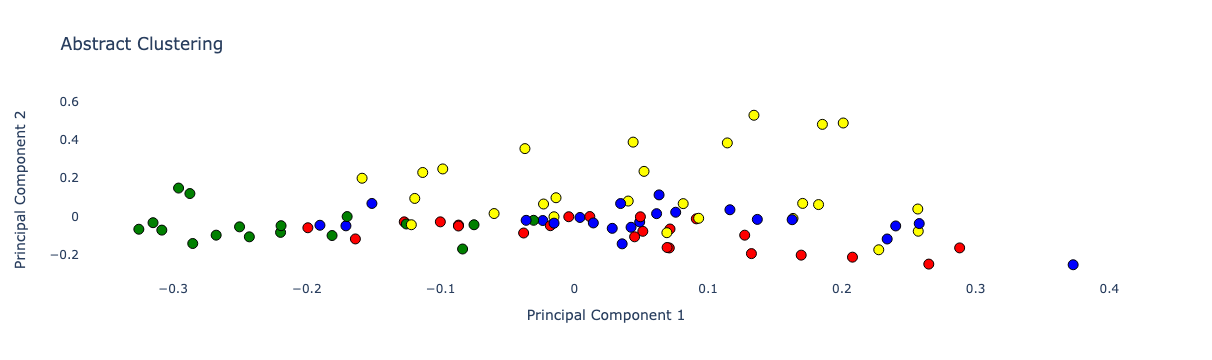

In [22]:
df['Cluster'] = cluster_labels

import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title']
))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=800
)

# Show the plot
fig.show()



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


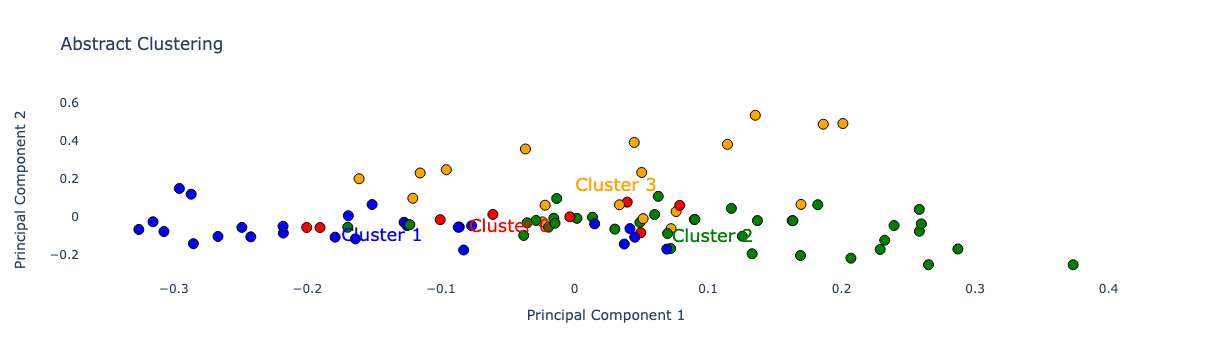

In [157]:
import plotly.graph_objects as go

# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'orange', 'orange']

# Define cluster names (you can customize this based on your requirement)
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig = go.Figure()

# Add scatter plot for data points
fig.add_trace(go.Scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title'],
    showlegend=False  # Hide the legend for data points
))

# Add text annotations for cluster names
for i, name in enumerate(cluster_names):
    cluster_x = X_pca[cluster_labels == i, 0].mean()  # Calculate mean x position for the cluster
    cluster_y = X_pca[cluster_labels == i, 1].mean()  # Calculate mean y position for the cluster
    fig.add_trace(go.Scatter(
        x=[cluster_x],
        y=[cluster_y],
        mode='text',
        text=[name],
        showlegend=False,
        textposition='bottom center',
        textfont=dict(size=18, color=cluster_colors[i])  # Set the text font size to 18 (you can adjust this value)
    ))

# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)

# Show the plot
fig.show()


### word clouds

In [152]:
from wordcloud import WordCloud

In [91]:
term_frequencies[0, tfidf_vectorizer.vocabulary_['model']]

4.040498806970412

In [115]:
# Calculate the sum of TF-IDF scores for each term
term_scores = np.sum(tfidf_matrix, axis=0)

# Get the vocabulary indices for the terms
vocab_indices = np.array(list(tfidf_vectorizer.vocabulary_.values()))

# Sort the terms based on their sum of TF-IDF scores in descending order
sorted_indices = np.argsort(-term_scores[0, vocab_indices])

# Get the top 10 most frequent words
top_10_indices = sorted_indices[0, : 10]
top_10_words = [tfidf_vectorizer.get_feature_names_out()[vocab_indices[i]] for i in top_10_indices]
top_10_words

[array([['biomedical', 'model', 'drug', 'text', 'bert', 'models', 'task',
         'extraction', 'performance', 'literature']], dtype=object)]

In [113]:
sorted_indices

matrix([[   9,  107,  405, ..., 2603, 2585, 2573]])

In [88]:
average_frequency

781.4946129017154

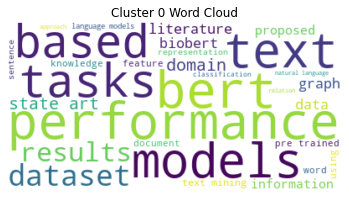

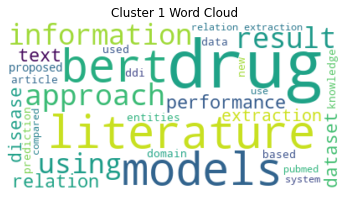

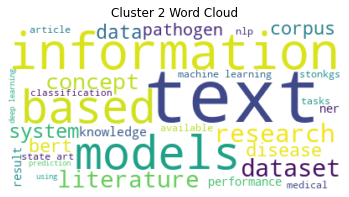

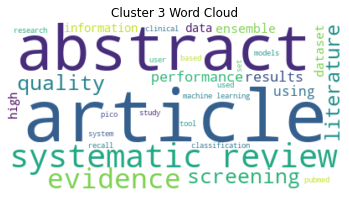

In [154]:
cluster_labels = kmeans.labels_

# Step 8: Calculate term frequencies across all clusters
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Calculate the term frequencies
term_frequencies = np.sum(tfidf_matrix, axis=0)

threshold = 3

words_to_remove = ['method', 'task', 'model', 'methods', 'biomedical']

for i in range(num_clusters):
    cluster_abstracts = df.loc[df['Cluster'] == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    cluster_text = ' '.join(word for word in cluster_text.split() if word not in words_to_remove)

    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white', max_words=30).generate(cluster_text)
    
    # Apply the term frequency threshold
    word_frequencies = wordcloud.process_text(cluster_text)
    # Apply the term frequency threshold
    filtered_words = [word for word in word_frequencies.keys() if word in tfidf_vectorizer.vocabulary_ and term_frequencies[0, tfidf_vectorizer.vocabulary_[word]] <= threshold]
    #print(filtered_words)
    #wordcloud.words_ = {word: freq for word, freq in word_frequencies.items() if word in filtered_words}
    #print(wordcloud.words_)

    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.savefig('Visuals/word_cloud_cluster_{}.png'.format(i))  # Change the format and resolution as needed
    plt.show()

In [77]:
tfidf_vectorizer.vocabulary_['motivation']

1739

In [78]:
term_frequencies[0, 1739]

0.43660389232414387

In [134]:
# Sort the dictionary items based on their values in descending order
sorted_items = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 dictionary objects (key-value pairs) based on the values
top_10_dict_objects = dict(sorted_items[:10])

print(top_10_dict_objects)

{'models': 28, 'quality': 27, 'systematic review': 26, 'evidence': 22, 'screening': 20, 'article': 20, 'abstract': 19, 'dataset': 18, 'using': 17, 'high': 16}


### using bioBERT embeddings

In [7]:
from transformers import AutoModel, AutoTokenizer

In [39]:
# Step 3: Load BioBERT model and tokenizer
#model_name = "dmis-lab/biobert-base-cased-v1.1"
#model = AutoModel.from_pretrained(model_name)
#tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 3: Load PubMedBERT model and tokenizer
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 4: Tokenize and encode the texts
encoded_inputs = tokenizer(df['Preprocessed_Abstract'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Step 5: Obtain the embeddings from BioBERT
outputs = model(**encoded_inputs)
embeddings = outputs.last_hidden_state

# Reshape the embeddings to have two dimensions
embeddings_2d = embeddings[:, 0, :].detach().numpy()

# Step 6: Apply the clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings_2d)

# Step 7: Assign cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no 

In [40]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 1: 43 documents
Cluster 3: 19 documents
Cluster 2: 17 documents
Cluster 0: 10 documents


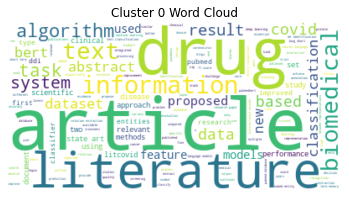

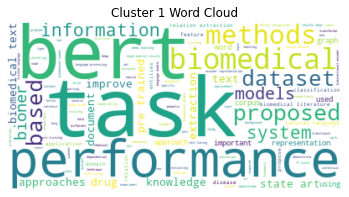

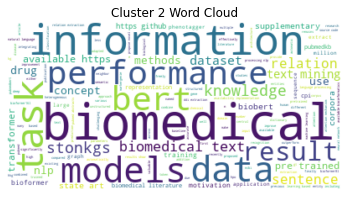

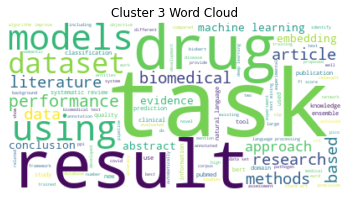

In [41]:
cluster_labels = kmeans.labels_

# Step 6: Generate a word cloud for each cluster
for i in range(num_clusters):
    cluster_abstracts = df.loc[cluster_labels == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.show()

In [42]:
pca = PCA(n_components=2, random_state=42)
embeddings_2d_pca = pca.fit_transform(embeddings_2d)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


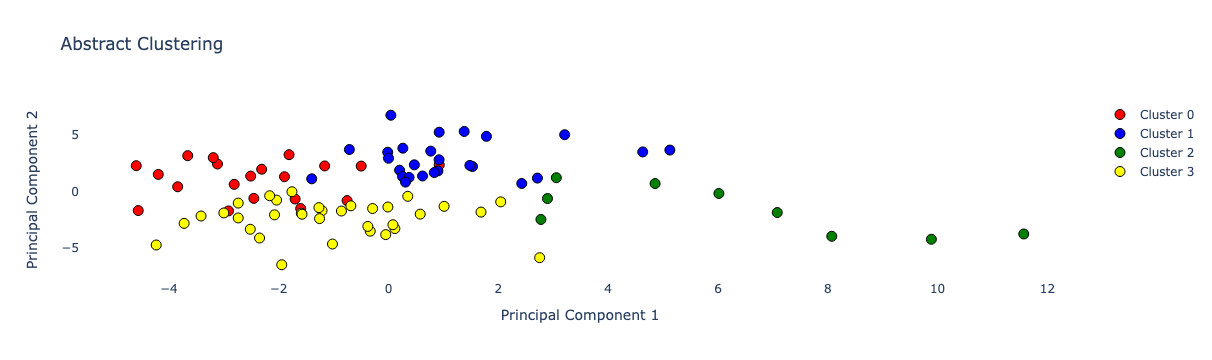

In [48]:
import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure()

# Reset the figure
fig.data = []

# Add scatter plots for each cluster
for label in set(cluster_labels):
    cluster_df = df[df['Cluster'] == label]
    fig.add_trace(go.Scatter(
        x=embeddings_2d_pca[cluster_df.index, 0],
        y=embeddings_2d_pca[cluster_df.index, 1],
        mode='markers',
        marker=dict(
            color=cluster_colors[label],
            size=10,  # Adjust the marker size here
            line=dict(width=1, color='Black')
        ),
        hovertemplate='<b>Title:</b> %{text}',
        text=cluster_df['title'],
        name=f'Cluster {label}'
    ))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)


# With this save the plots 
plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [370]:
len(embeddings_2d[0])

768